In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import numpy as np
from utils_nd import *

In [2]:
# point to experiment of interest
expt_id = 'jh_004'

out_dir = f'./outputs/{expt_id}/'
make_dir(out_dir)

In [3]:
csv_paths = f'./data/{expt_id}/'

csv_files = glob.glob(os.path.join(csv_paths, f"*.csv"))

print(csv_files)

['./data/jh_004/29_bindingnorm.csv', './data/jh_004/30_bindingnorm.csv', './data/jh_004/31_bindingnorm.csv', './data/jh_004/32_bindingnorm.csv', './data/jh_004/33_bindingnorm.csv', './data/jh_004/34_bindingnorm.csv', './data/jh_004/35_bindingnorm.csv', './data/jh_004/36_bindingnorm.csv', './data/jh_004/37_bindingnorm.csv']


yJH29
yJH30
yJH31
yJH32
yJH33
yJH34
yJH35
yJH36
yJH37


<Figure size 640x480 with 0 Axes>

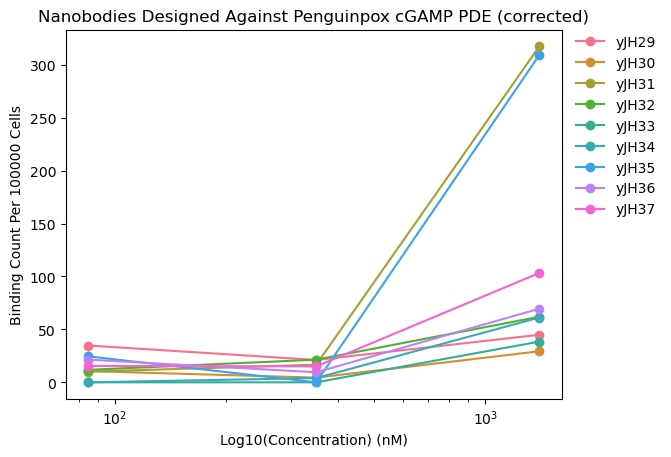

In [4]:
cell_graph_dict = {}
for path in csv_files:
    # sample_name = 'yJH' + path.split('/').replace('_bindingnorm.csv','')
    bind_df = pd.read_csv(path, index_col=0)

    sample_name = bind_df['cell_name'][0]

    cell_graph_dict[sample_name] = bind_df
    # print(bind_df)

    
big_graph_df = pd.concat(
    [df.assign(cell_key = key) for key, df in cell_graph_dict.items()],
    ignore_index=True)
# print(x)
big_graph_df = big_graph_df[big_graph_df['concentration'] > 0]
x = big_graph_df['concentration'].unique()
colors = sns.color_palette("husl", len(cell_graph_dict.keys()))
plt.clf()
fig, ax = plt.subplots()
for idx, cell in enumerate(big_graph_df['cell_name'].unique()):
    print(cell)
    row = big_graph_df[big_graph_df['cell_name'] == cell]
    y = row['correctedbinding'] * 1E5
    # print(x)
    # print(y)
    slope, yint = np.polyfit(x, y, 1)
    # if slope > slope_cutoff:
    # print(y)
    # plt.plot(x,
    #          y, 
    #          color=colors[idx], 
    #          label=cell)
    ax.plot(x,
            y, 
            marker = 'o',
            color=colors[idx], 
            label=cell)
    ax.set_xscale('log', base=10)
    plt.xlabel('Log10(Concentration) (nM)')
    plt.ylabel('Binding Count Per 100000 Cells')
    plt.title(f'Nanobodies Designed Against Penguinpox cGAMP PDE (corrected)')
    plt.legend(loc = 'upper right', 
               bbox_to_anchor=(1.2, 1), 
               borderaxespad=0, 
               frameon=False)
bind_outpath = f'{out_dir}nbbinding_corrected_all.png'
# plt.savefig(bind_outpath, bbox_inches='tight', dpi=800)
plt.show()
plt.close()


[1400  350   85    0]
yJH29
0    57.452296
1    25.649168
2    40.306820
4     8.527434
Name: onbindnorm, dtype: float64
yJH30
5    51.252563
6    22.341376
7    28.531732
9    19.912633
Name: onbindnorm, dtype: float64
yJH31
10    345.698384
11     42.865366
12     34.275502
13     26.795284
Name: onbindnorm, dtype: float64
yJH32
15    97.523640
16    54.959818
17    52.354109
18    31.504841
Name: onbindnorm, dtype: float64
yJH33
20    100.241322
21     34.563634
22     53.013118
23     36.928076
Name: onbindnorm, dtype: float64
yJH34
25    101.325886
26     38.074183
27     35.380092
28     37.893605
Name: onbindnorm, dtype: float64
yJH35
30    351.191811
31     34.610630
32     56.398122
33     28.112548
Name: onbindnorm, dtype: float64
yJH36
35    100.096196
36     36.026187
37     46.947197
38     16.041263
Name: onbindnorm, dtype: float64
yJH37
40    138.588890
41     50.347521
42     48.760865
43     34.016085
Name: onbindnorm, dtype: float64


<Figure size 640x480 with 0 Axes>

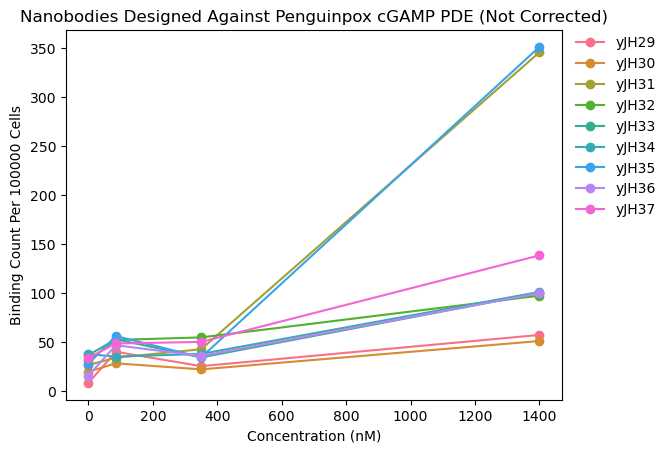

In [5]:
cell_graph_dict = {}
for path in csv_files:
    # sample_name = 'yJH' + path.split('/').replace('_bindingnorm.csv','')
    bind_df = pd.read_csv(path, index_col=0)

    sample_name = bind_df['cell_name'][0]

    cell_graph_dict[sample_name] = bind_df
    # print(bind_df)

    
big_graph_df = pd.concat(
    [df.assign(cell_key = key) for key, df in cell_graph_dict.items()],
    ignore_index=True)
# print(x)
# big_graph_df = big_graph_df[big_graph_df['concentration'] > 0]
x = big_graph_df['concentration'].unique()
print(x)
colors = sns.color_palette("husl", len(cell_graph_dict.keys()))
plt.clf()
fig, ax = plt.subplots()
for idx, cell in enumerate(big_graph_df['cell_name'].unique()):
    print(cell)
    cellnum = int(''.join(filter(str.isdigit, cell)))
    row = big_graph_df[big_graph_df['cell_name'] == cell]
    row = row[row['rep_key'] != f'{cellnum}_NoAg']
    y = row['onbindnorm'] * 1E5
    # print(x)
    print(y)
    slope, yint = np.polyfit(x, y, 1)
    # if slope > slope_cutoff:
    # print(y)
    # plt.plot(x,
    #          y, 
    #          color=colors[idx], 
    #          label=cell)
    ax.plot(x,
            y, 
            marker = 'o',
            color=colors[idx], 
            label=cell)
    # ax.set_xscale('log', base=10)
    plt.xlabel('Concentration (nM)')
    plt.ylabel('Binding Count Per 100000 Cells')
    plt.title(f'Nanobodies Designed Against Penguinpox cGAMP PDE (Not Corrected)')
    plt.legend(loc = 'upper right', 
               bbox_to_anchor=(1.2, 1), 
               borderaxespad=0, 
               frameon=False)
bind_outpath = f'{out_dir}nbbinding_nocorrection_all.png'
plt.savefig(bind_outpath, bbox_inches='tight', dpi=800)
plt.show()
plt.close()
